<a href="https://www.kaggle.com/code/matinrasoulzad/food-classification-using-cnn?scriptVersionId=193995095" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Food Image classification using CNN 🥩🍕

## Importing main Libs:

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")
sns.set_context(context="paper")

## Download via this cell:

This dataset is a subset from famous food-101 dataset **(https://www.kaggle.com/datasets/dansbecker/food-101)**, which contains *"steak"* & *"pizza"* images
**(https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip)**

In [2]:
!tree  /kaggle/input/food-classification-steak-and-pizza/

/kaggle/input/food-classification-steak-and-pizza/
|-- Notebook.ipynb
|-- README.md
|-- docs
|   |-- CNN.jpg
|   |-- model_1.png
|   |-- model_2.png
|   |-- model_3.png
|   |-- notebook.png
|   |-- pizza.jpg
|   |-- pizza2.jpg
|   |-- steak.jpg
|   |-- steak2.jpg
|   `-- tinyvgg.png
|-- final_check
|   |-- pizza.jpg
|   |-- pizza2.jpg
|   |-- steak.jpg
|   `-- steak2.jpg
`-- pizza_steak
    |-- test
    |   |-- pizza
    |   |   |-- 103708.jpg
    |   |   |-- 106507.jpg
    |   |   |-- 11297.jpg
    |   |   |-- 121960.jpg
    |   |   |-- 124815.jpg
    |   |   |-- 129666.jpg
    |   |   |-- 138961.jpg
    |   |   |-- 139952.jpg
    |   |   |-- 139987.jpg
    |   |   |-- 140016.jpg
    |   |   |-- 144631.jpg
    |   |   |-- 148765.jpg
    |   |   |-- 153195.jpg
    |   |   |-- 177513.jpg
    |   |   |-- 194643.jpg
    |   |   |-- 194784.jpg
    |   |   |-- 195160.jpg
    |   |   |-- 204151.jpg
    |   |   |-- 212995.jpg
    |   |   |-- 22489.jpg
    |   |   |-- 226472.jpg
    |   |   |-

In [3]:
import os

for dirpath , dirnames , filenames in os.walk("/kaggle/input/food-classification-steak-and-pizza/"):
    print(f"There are: {len(dirnames)} directories, {len(filenames)} files in: '{dirpath}'")

There are: 4 directories, 3 files in: '/kaggle/input/food-classification-steak-and-pizza/'
There are: 0 directories, 4 files in: '/kaggle/input/food-classification-steak-and-pizza/final_check'
There are: 0 directories, 1 files in: '/kaggle/input/food-classification-steak-and-pizza/.ipynb_checkpoints'
There are: 1 directories, 10 files in: '/kaggle/input/food-classification-steak-and-pizza/docs'
There are: 0 directories, 2 files in: '/kaggle/input/food-classification-steak-and-pizza/docs/.ipynb_checkpoints'
There are: 2 directories, 0 files in: '/kaggle/input/food-classification-steak-and-pizza/pizza_steak'
There are: 2 directories, 0 files in: '/kaggle/input/food-classification-steak-and-pizza/pizza_steak/test'
There are: 0 directories, 100 files in: '/kaggle/input/food-classification-steak-and-pizza/pizza_steak/test/steak'
There are: 1 directories, 100 files in: '/kaggle/input/food-classification-steak-and-pizza/pizza_steak/test/pizza'
There are: 0 directories, 3 files in: '/kaggle/in

`Train` : **750** label images🔥<br>
`Test` : **250** label images🔥

## Inspecting the dataset

### Steak

Image shape is: (512, 512, 3)


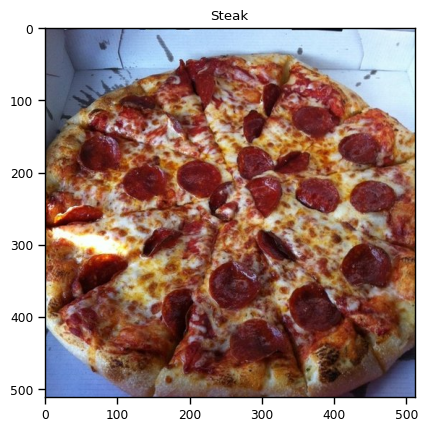

In [4]:
img = mpimg.imread("/kaggle/input/food-classification-steak-and-pizza/pizza_steak/train/pizza/1001116.jpg")
plt.title("Steak")
plt.imshow(img)
print("Image shape is:",img.shape)

### Pizza

Image shape is: (341, 512, 3)


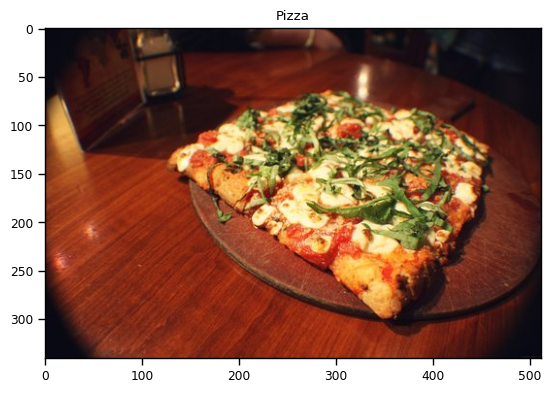

In [5]:
img = mpimg.imread("/kaggle/input/food-classification-steak-and-pizza/pizza_steak/train/pizza/307677.jpg")
plt.title("Pizza")
plt.imshow(img)
print("Image shape is:",img.shape)

### Color channel separation

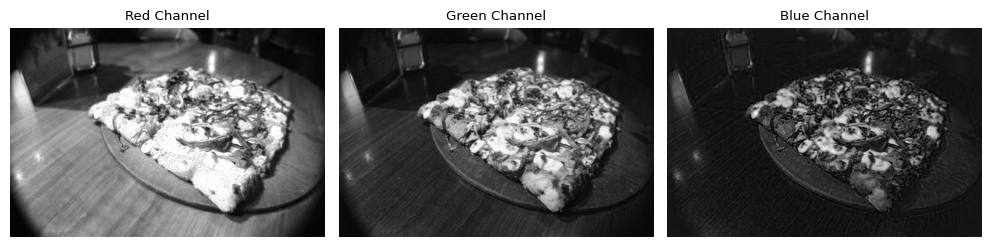

In [6]:
# Split the channels
red_channel = img[:, :, 0]   # Red channel
green_channel = img[:, :, 1] # Green channel
blue_channel = img[:, :, 2]  # Blue channel

# Plotting the channels
plt.figure(figsize=(10, 4))

# Red channel
plt.subplot(1, 3, 1)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

# Green channel
plt.subplot(1, 3, 2)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

# Blue channel
plt.subplot(1, 3, 3)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()

## Preprocessing

### Data selection & Normalization

In [7]:
#Creating an image generator
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_path = "/kaggle/input/food-classification-steak-and-pizza/pizza_steak/train"
val_path = "/kaggle/input/food-classification-steak-and-pizza/pizza_steak/test"

#Directing image data to the pipepline
train_data = train_datagen.flow_from_directory(train_path,target_size=(224,224),class_mode="binary",seed=42)
val_data = val_datagen.flow_from_directory(val_path,target_size=(224,224),class_mode="binary",seed=42)

Found 1802 images belonging to 2 classes.
Found 203 images belonging to 2 classes.


## Building CNN model

In [8]:
#Set a random seed to be able to reproduce
tf.random.set_seed(42)

A convolutional neural network is a regularized type of feed-forward neural network that learns features by itself via filter optimization.

### VGG approach

`VGG (Visual Geometry Group)` is a convolutional neural network architecture that was proposed by researchers from the University of Oxford in 2014. It gained popularity and recognition for its simplicity and effectiveness in image classification tasks.


### Architecture
- **Convolutional Layers**: Tiny VGG consists of several convolutional layers. Each layer uses small 3x3 filters, which help in capturing fine details while maintaining a manageable number of parameters.
- **ReLU Activation**: After each convolution, a ReLU (Rectified Linear Unit) activation function is applied to introduce non-linearity into the model.
- **Pooling Layers**: Max pooling layers (usually 2x2) are interspersed between convolutional layers to reduce the spatial dimensions of the feature maps, effectively downsampling the input.
- **Fully Connected Layers**: After the convolutional and pooling layers, the output is flattened and passed through one or more fully connected (dense) layers.
- **Softmax Layer**: The final layer typically uses a softmax activation function to output class probabilities for classification tasks.

Epoch 1/5


I0000 00:00:1724578130.253616      89 service.cc:145] XLA service 0x7b97640045e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724578130.253670      89 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724578130.253675      89 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/57 ━━━━━━━━━━━━━━━━━━━━ 6:59 7s/step - accuracy: 0.4062 - loss: 0.7031

I0000 00:00:1724578134.739324      89 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


57/57 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.6322 - loss: 0.6215 - val_accuracy: 0.8079 - val_loss: 0.4244
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.8195 - loss: 0.4214 - val_accuracy: 0.8719 - val_loss: 0.3413
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.8068 - loss: 0.4157 - val_accuracy: 0.8424 - val_loss: 0.3738
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8412 - loss: 0.3679 - val_accuracy: 0.8719 - val_loss: 0.3098
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8367 - loss: 0.3561 - val_accuracy: 0.8571 - val_loss: 0.3446


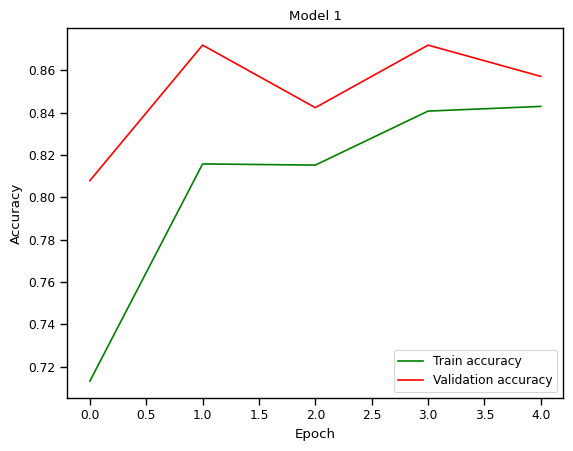

In [9]:
model_1 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(0.001),metrics=["accuracy"])
history_1 = model_1.fit(train_data,epochs=5,validation_data=val_data)


# Plot training and validation accuracy
sns.lineplot(x=history_1.epoch, y=history_1.history["accuracy"], c="green", label="Train accuracy")
sns.lineplot(x=history_1.epoch, y=history_1.history["val_accuracy"], c="red", label="Validation accuracy")
plt.title("Model 1")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

`🧠 - Model 1`: Performed quite satisfying. The data is correctly fitted; However, It can be fitted better.

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - accuracy: 0.6035 - loss: 0.6582 - val_accuracy: 0.6946 - val_loss: 0.5445
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.7522 - loss: 0.5412 - val_accuracy: 0.7931 - val_loss: 0.4755
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.7595 - loss: 0.5043 - val_accuracy: 0.7931 - val_loss: 0.4772
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.7914 - loss: 0.4852 - val_accuracy: 0.8177 - val_loss: 0.4245
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.7812 - loss: 0.4585 - val_accuracy: 0.8128 - val_loss: 0.3944


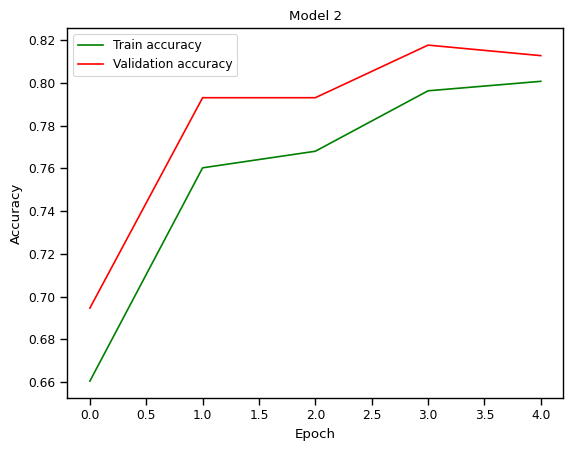

In [10]:
model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(0.0001),metrics=["accuracy"])
history_2 = model_2.fit(train_data,epochs=5,validation_data=val_data)

# Plot training and validation accuracy
sns.lineplot(x=history_2.epoch, y=history_2.history["accuracy"], c="green", label="Train accuracy")
sns.lineplot(x=history_2.epoch, y=history_2.history["val_accuracy"], c="red", label="Validation accuracy")
plt.xlabel("Epoch")
plt.title("Model 2")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

`🧠 - Model 2`: The model performed weaker than *Model 1*

Epoch 1/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.8002 - loss: 0.4229 - val_accuracy: 0.8276 - val_loss: 0.3799
Epoch 2/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8205 - loss: 0.4143 - val_accuracy: 0.8473 - val_loss: 0.3699
Epoch 3/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.8304 - loss: 0.4001 - val_accuracy: 0.8227 - val_loss: 0.3671
Epoch 4/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.8310 - loss: 0.3799 - val_accuracy: 0.8227 - val_loss: 0.3579
Epoch 5/5
57/57 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.8276 - loss: 0.3865 - val_accuracy: 0.8276 - val_loss: 0.3548


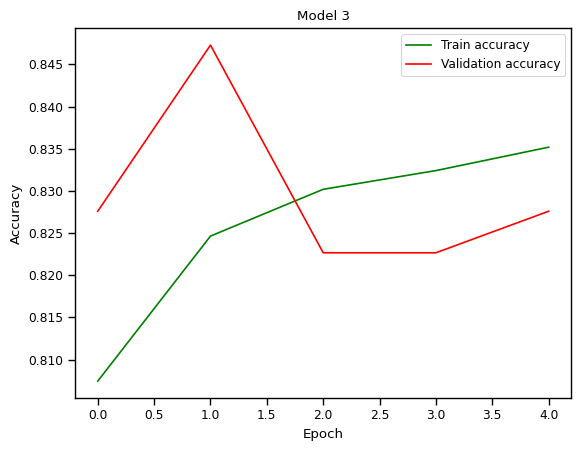

In [11]:
model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(0.01),metrics=["accuracy"])
history_3 = model_2.fit(train_data,epochs=5,validation_data=val_data)


# Plot training and validation accuracy
sns.lineplot(x=history_3.epoch, y=history_3.history["accuracy"], c="green", label="Train accuracy")
sns.lineplot(x=history_3.epoch, y=history_3.history["val_accuracy"], c="red", label="Validation accuracy")
plt.xlabel("Epoch")
plt.title("Model 3")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

`🧠 - Model 3`: Performed nearly like *Model 1*

In [12]:
train_accuracy = history_1.history["accuracy"]
val_accuracy = history_1.history["val_accuracy"]

df = pd.DataFrame({
    "Epoch": range(1, len(train_accuracy) + 1),  
    "Train Accuracy": train_accuracy,
    "Validation Accuracy": val_accuracy})
print(f"Train accuracy: {np.mean(train_accuracy[-4:-1]):0.4f}")
print(f"Validation accuracy: {np.mean(val_accuracy[-4:-1]):0.4f}")
df

Train accuracy: 0.8239
Validation accuracy: 0.8621


,Epoch,Train Accuracy,Validation Accuracy
0,1,0.713097,0.807882
1,2,0.815760,0.871921
2,3,0.815205,0.842365
3,4,0.840733,0.871921
4,5,0.842952,0.857143


In [13]:
train_accuracy = history_2.history["accuracy"]
val_accuracy = history_2.history["val_accuracy"]

df = pd.DataFrame({
    "Epoch": range(1, len(train_accuracy) + 1), 
    "Train Accuracy": train_accuracy,
    "Validation Accuracy": val_accuracy})
print(f"Train accuracy: {np.mean(train_accuracy[-4:-1]):0.4f}")
print(f"Validation accuracy: {np.mean(val_accuracy[-4:-1]):0.4f}")
df

Train accuracy: 0.7749
Validation accuracy: 0.8013


,Epoch,Train Accuracy,Validation Accuracy
0,1,0.660377,0.694581
1,2,0.760266,0.793103
2,3,0.768036,0.793103
3,4,0.796337,0.817734
4,5,0.800777,0.812808


In [14]:
train_accuracy = history_3.history["accuracy"]
val_accuracy = history_3.history["val_accuracy"]

df = pd.DataFrame({
    "Epoch": range(1, len(train_accuracy) + 1),  
    "Train Accuracy": train_accuracy,
    "Validation Accuracy": val_accuracy})
print(f"Train accuracy: {np.mean(train_accuracy[-4:-1]):0.4f}")
print(f"Validation accuracy: {np.mean(val_accuracy[-4:-1]):0.4f}")
df

Train accuracy: 0.8291
Validation accuracy: 0.8309


,Epoch,Train Accuracy,Validation Accuracy
0,1,0.807436,0.827586
1,2,0.824639,0.847291
2,3,0.830189,0.822660
3,4,0.832408,0.822660
4,5,0.835183,0.827586


#### So `Model 1` was the most stable and accurate model. Using `Model 1` as the `Final Model` 

In [15]:
final_model = model_1

## Prediction & final check

In [16]:
class_names = ['pizza','steak']

def pred_and_plot(model, filename, class_names,img_shape=224):
    
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
[[0.8376938]]


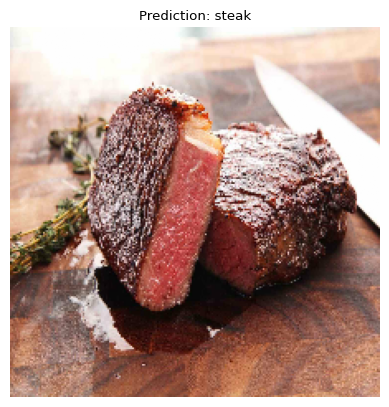

In [17]:
pred_and_plot(final_model, "/kaggle/input/food-classification-steak-and-pizza/final_check/steak.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.00879468]]


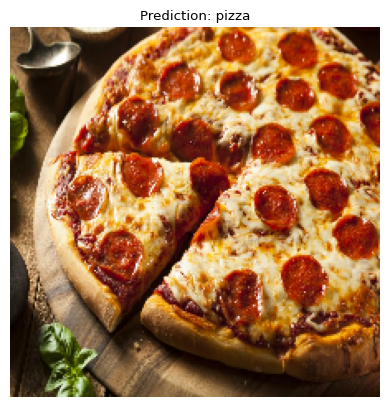

In [18]:
pred_and_plot(final_model, "/kaggle/input/food-classification-steak-and-pizza/final_check/pizza.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
[[0.4266261]]


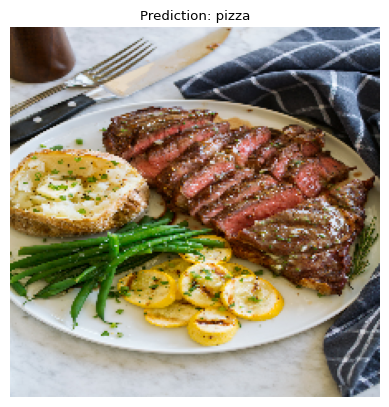

In [19]:
pred_and_plot(final_model, "/kaggle/input/food-classification-steak-and-pizza/final_check/steak2.jpg", class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0.00196047]]


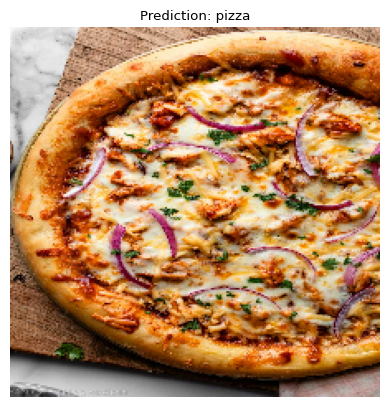

In [20]:
pred_and_plot(final_model, "/kaggle/input/food-classification-steak-and-pizza/final_check/pizza2.jpg", class_names)

## Results

`Final Model`  predictions: **True✅**, **True✅**, **True✅**, **True✅**

`Final Model`  prediction probability: **97%✅**, **64%✅**, **77%✅**, **97%✅**

# Made with ☕ & ❤️ by Matin Rasoulzad

- **linkedin:** https://www.linkedin.com/in/matin-rasoulzad/
- **Github:** https://github.com/Matin-Rasoulzad